In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
MP_KEY = os.getenv("MP_KEY")
print(MP_KEY)

BvmlZBGVskfWkriS4bROluvq7ywFCIts


In [4]:
from mp_api.client import MPRester
mpr = MPRester(MP_KEY)

C:\tools\Manim\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def descriptors(structure, bg):
    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]
    
    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]
    
    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = a_parameters*b_parameters*c_parameters
    Density = V / numElements

    descriptors_list = atomic_numbers +\
        [Density] +\
        [alpha_parameters] +\
        [beta_parameters] +\
        [gamma_parameters] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list +\
        bg
    return descriptors_list

In [6]:
print(mpr.materials.summary.available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

In [8]:
docs = mpr.materials.summary.search(
        material_ids=["mp-569890", "mp-27734", "mp-1213805"], fields=["material_id", "structure", "band_gap"]
    )

Retrieving SummaryDoc documents: 100%|██████████| 3/3 [00:00<?, ?it/s]


In [ ]:
mpids = []
mpstruct = {}
mpbg = {}

for doc in docs:
    mpids.append(doc.material_id)
    mpstruct[doc.material_id] = doc.structure
    mpbg[doc.material_id] = doc.band_gap

mpbg

[1.4598, 1.1590000000000003, 1.2759]

In [ ]:
# CrCl3, CrBr3, CrI3
target_bgs = {
    "mp-569890": {
        0.49: 1.196363636
    },
    "mp-27734": {
        0.49: 1.192727273
    },
    "mp-1213805": {
        0.49: 1.150909091
    }
}

- Input Material
- Excitation Wavelength
- Doping Material
- Doping Concentration

-> Predict Emission Wavelength

In [ ]:
def get_material_features(structure, doping_concentration=0.0):
    # Get the base descriptors
    base_features = descriptors(structure)
    
    # Add doping-specific features
    # For Yb, hardcode some properties since it's not in MP
    yb_properties = {
        'atomic_number': 70,
        'van_der_waals_radius': 2.4,
        'ionic_radius': 0.99,
        # Add other relevant Yb properties here
    }
    
    # Add doping features to the descriptor list
    doping_features = [
        doping_concentration,
        yb_properties['atomic_number'],
        yb_properties['van_der_waals_radius'],
        yb_properties['ionic_radius']
    ]
    
    return base_features + doping_features

In [ ]:
def create_training_data(ids, structures, band_gaps, target):
    X = []
    y = []  # Emission wavelengths (dummy data for now)
    
    for id in ids:
        concentrations = target[id]
        for conc in concentrations:
            features = get_material_features(structures[id], band_gaps[id], doping_concentration=conc)
            X.append(features)
            
            # Generate dummy emission wavelength (replace this with real data later)
            # For now, say emission wavelength is roughly excitation wavelength + some factor based on concentration
            y.append(concentrations[conc])
    
    return np.array(X), np.array(y)

In [ ]:
# Create the dataset
X, y = create_training_data(mpids, mpstruct, mpbg, target_bgs)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models (let's try both RF and XGBoost as you were using before)
rf_model = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
xgb_model.fit(X_train_scaled, y_train)

c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Cr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Cr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Cr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-pac

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Function to make predictions for new materials
def predict_emission_wavelength(structure, bg, doping_concentration, model=rf_model, scaler=scaler):
    features = get_material_features(structure, bg, doping_concentration=doping_concentration)
    features_scaled = scaler.transform([features])
    return model.predict(features_scaled)[0]

Random Forest Results:
MAE: 0.0003
R2:  0.9997



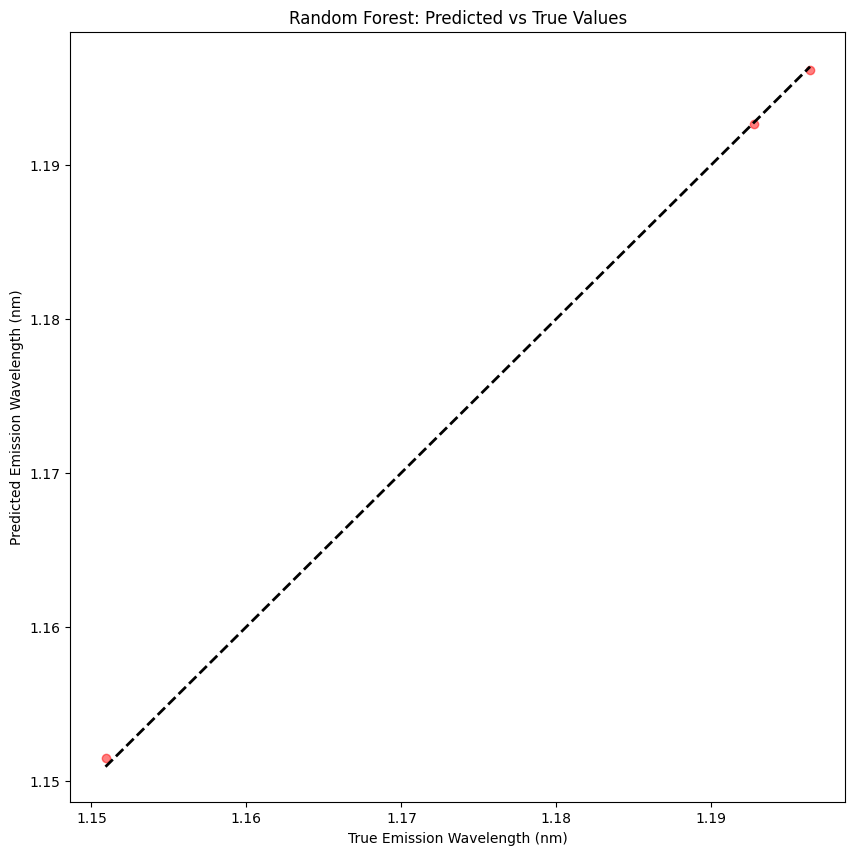

In [16]:
# Make predictions and evaluate RF model
y_pred_rf = rf_model.predict(X_test_scaled)

print('Random Forest Results:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}')
print(f'R2:  {r2_score(y_test, y_pred_rf):.4f}\n')

# RF correlation plot
plt.figure(figsize=(10, 10))
plt.plot(y_test, y_pred_rf, 'ro', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('True Emission Wavelength (nm)')
plt.ylabel('Predicted Emission Wavelength (nm)')
plt.title('Random Forest: Predicted vs True Values')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')
plt.show()

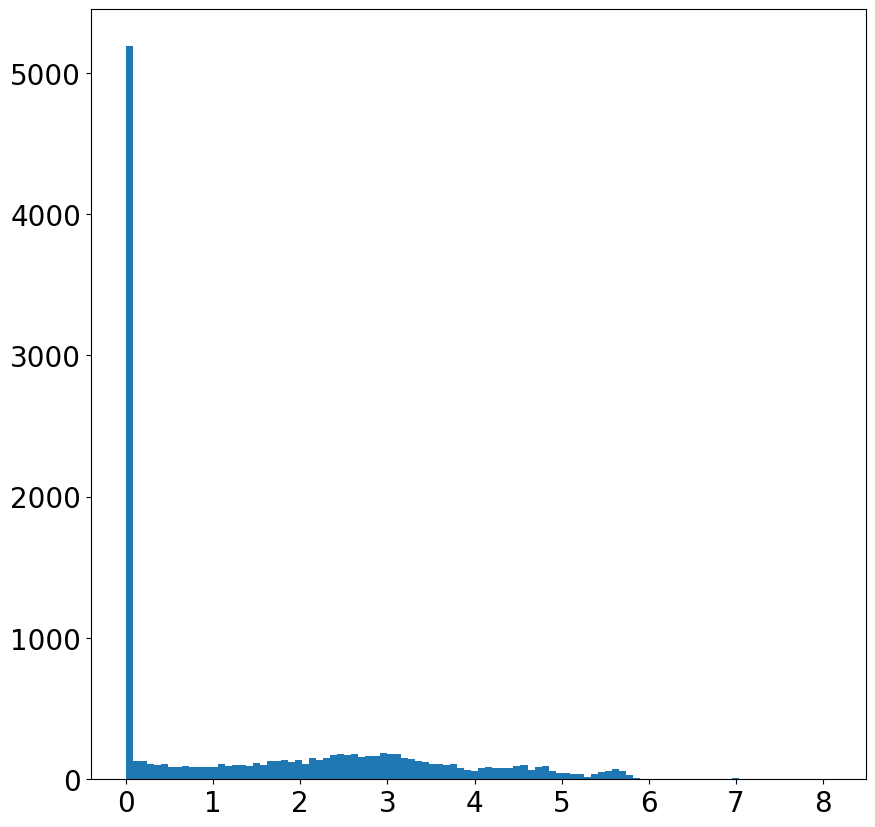

In [10]:
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

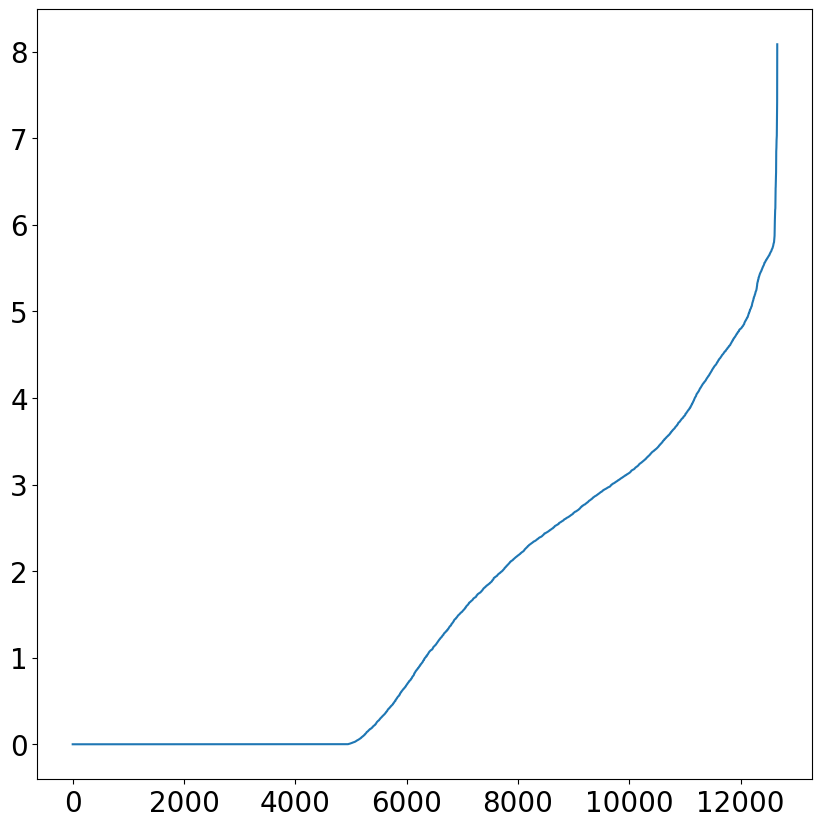

In [11]:
band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot', bbox_inches='tight')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_df, band_gaps, test_size=.2, random_state=None)

In [18]:
# We need to normalize the data using a scaler

# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Next, we create a pandas DataFrame object


RF MAE	0.4498412095181673

RF R2	0.7746797436774853

XGBOOST MAE	0.43162935681051096

XGBOOST R2	0.7703738212585449



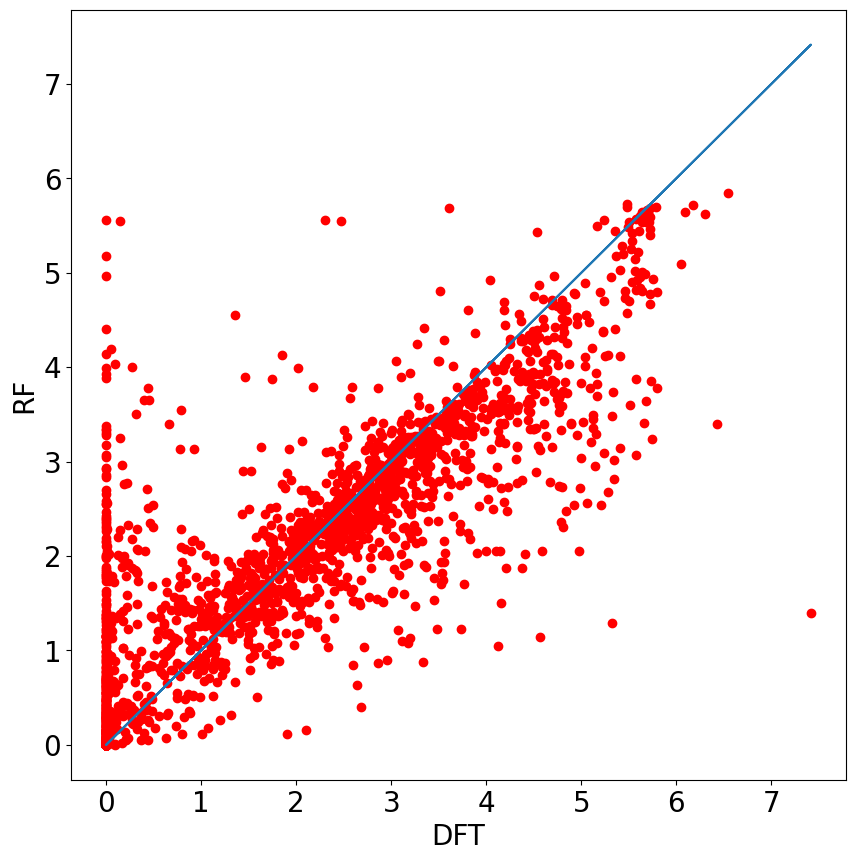

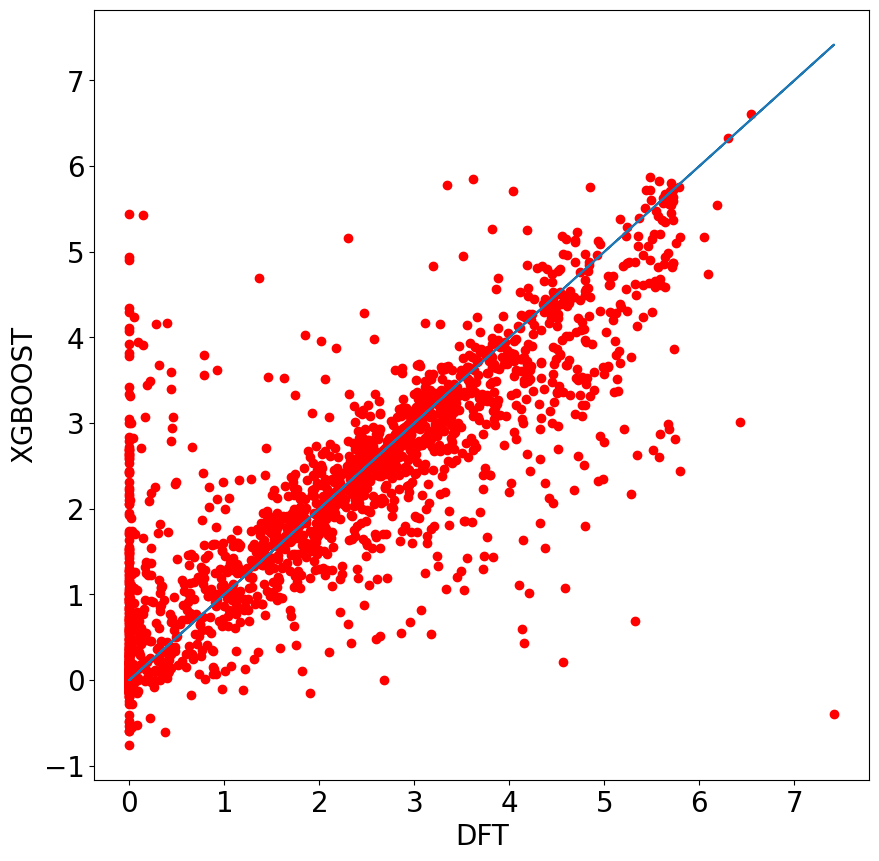

In [19]:
regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')